<a href="https://colab.research.google.com/github/FawneeCakes/python-api-challenge/blob/main/WeatherPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# Find the latest version of spark 3.x  from https://downloads.apache.org/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.1'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,922 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,189 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted 

In [14]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=a94d88c7a2a7239f5c396d3f68331205bdb51553d06705ea32390f0740e7cbc2
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Instead of importing, directly define your API key as a variable
weather_api_key = "15d99dca10a8aafb3106eafb0590e5f1"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general toshevo
Processing Record 2 of Set 1 | mammoth lakes
Processing Record 3 of Set 1 | monte alegre
Processing Record 4 of Set 1 | deland
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | santa cruz
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | khilok
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | san jose de jachal
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | island harbour
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bandar lampung
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | machico
Processing Record 21

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general toshevo,43.7000,28.0333,21.74,76,0,3.39,BG,1719256589
1,mammoth lakes,37.6485,-118.9721,26.40,29,0,5.14,US,1719256549
2,monte alegre,-2.0078,-54.0692,30.42,57,94,1.03,BR,1719256590
3,deland,29.0283,-81.3031,36.09,52,40,1.54,US,1719256590
4,hamilton,39.1834,-84.5333,31.39,46,40,2.57,US,1719256590


In [23]:
city_data_df.to_csv("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\cities_data.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df.to_csv("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\cities_data.csv", index_label="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general toshevo,43.7000,28.0333,21.74,76,0,3.39,BG,1719256589
1,mammoth lakes,37.6485,-118.9721,26.40,29,0,5.14,US,1719256549
2,monte alegre,-2.0078,-54.0692,30.42,57,94,1.03,BR,1719256590
3,deland,29.0283,-81.3031,36.09,52,40,1.54,US,1719256590
4,hamilton,39.1834,-84.5333,31.39,46,40,2.57,US,1719256590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

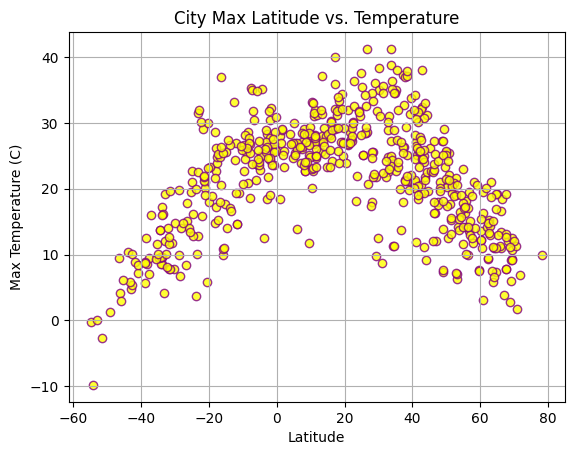

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],facecolor="yellow", edgecolor="purple", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\MyFig1.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude Vs. Humidity

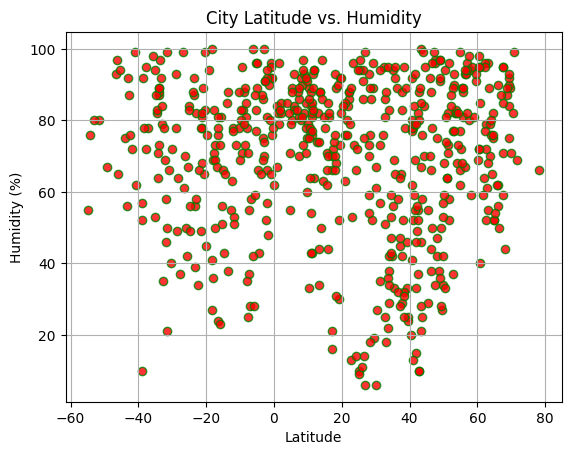

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],facecolor="red", edgecolor="green", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\MyFig2.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

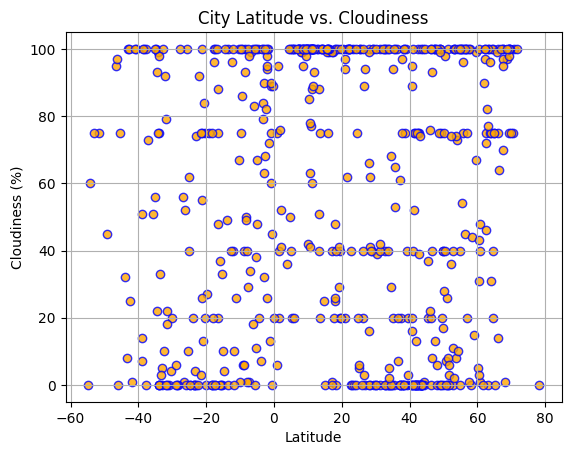

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],facecolor="orange", edgecolor="blue", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\MyFig3.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

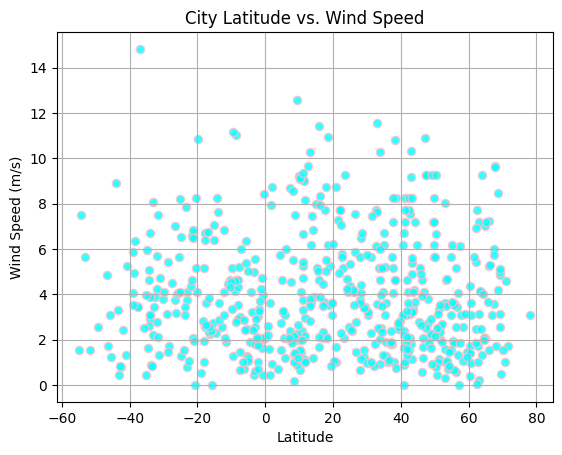

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],facecolor="cyan", edgecolor="pink", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\\RU GitHub Rep\\python-api-challenge\\WeatherPy\\output_data\\MyFig4.png") # Use backslashes consistently

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):

    # Calculate the regression line slope and intercept
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

     # Add the regression line to the plot
    regression_value = x_values * slope + intercept

    # Add the equation of the line to the plot
    line_eq = "y =" +  str(round(slope, 2)) + "x+" + str(round(intercept, 2))

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_value, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    #Print out r value
    print(f'the r-value is: {rvalue**2}')

    # Show the plot
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general toshevo,43.7000,28.0333,21.74,76,0,3.39,BG,1719256589
1,mammoth lakes,37.6485,-118.9721,26.40,29,0,5.14,US,1719256549
3,deland,29.0283,-81.3031,36.09,52,40,1.54,US,1719256590
4,hamilton,39.1834,-84.5333,31.39,46,40,2.57,US,1719256590
9,khilok,51.3674,110.4676,15.24,73,100,1.15,RU,1719256592


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,monte alegre,-2.0078,-54.0692,30.42,57,94,1.03,BR,1719256590
5,port elizabeth,-33.9180,25.5701,17.28,87,75,6.69,ZA,1719256591
6,santa cruz,-17.8000,-63.1667,22.70,83,100,6.69,BO,1719256486
7,margaret river,-33.9500,115.0667,8.49,73,0,2.91,AU,1719256591
8,grytviken,-54.2811,-36.5092,-9.81,76,60,7.50,GS,1719256591


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.41314812879689666


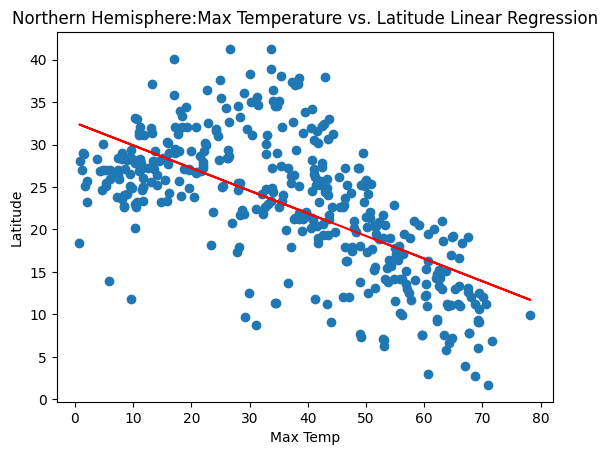

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Northern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (6,-10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.6544265262139067


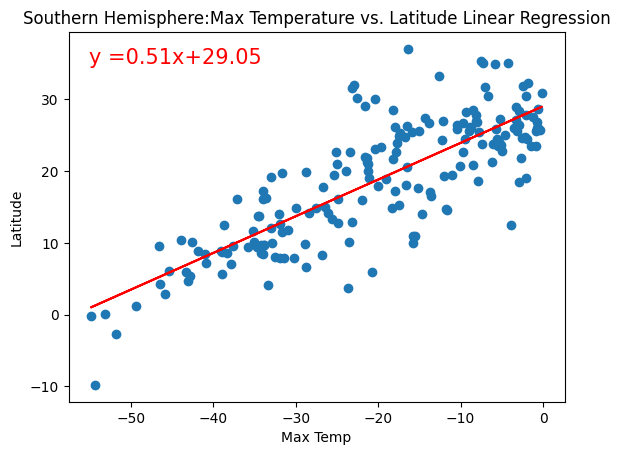

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Southern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (-55,35)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship**: The futher from the equator, the lower the max temperature is. The northern hemisphere has a lower max temp than the southern hempisphere.

---

# **Humidity vs. Latitude Linear Regression Plot**

the r-value is: 0.0002509741495345691


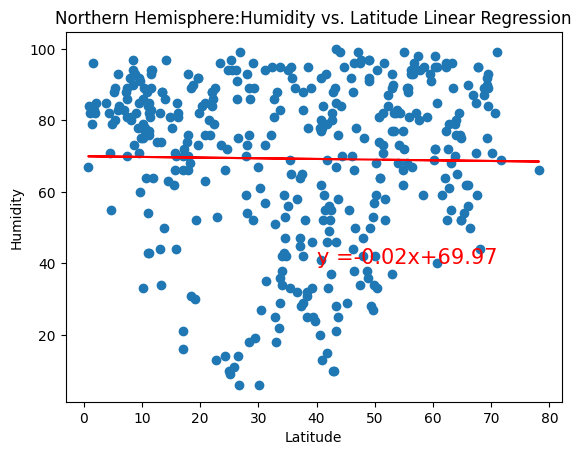

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Northern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (40,40)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.0002119607183621121


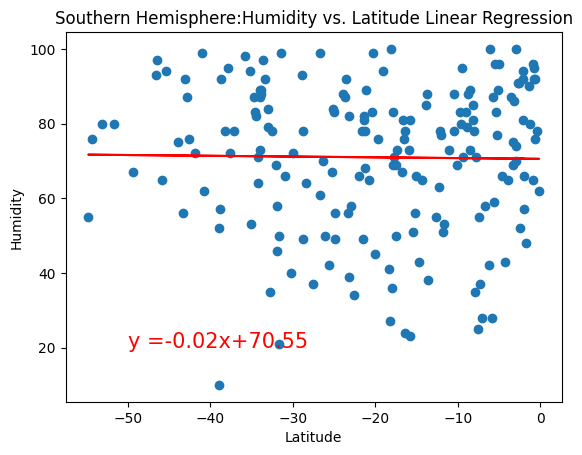

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Southern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (-50,20)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** Humidity range is about the same in both the northern and southern hemisphere

the r-value is: 0.01851546921057217


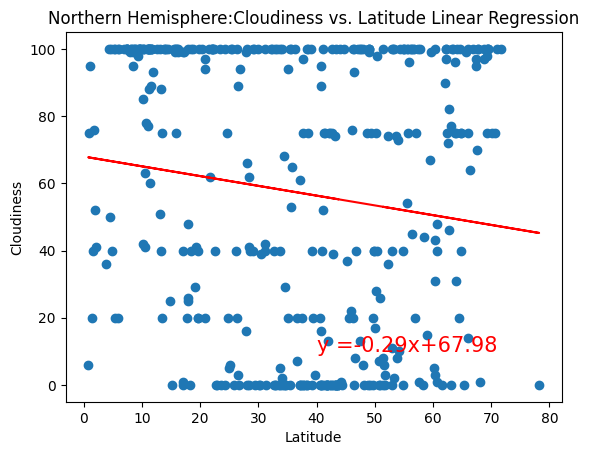

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Northern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (40,10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.01575730632169844


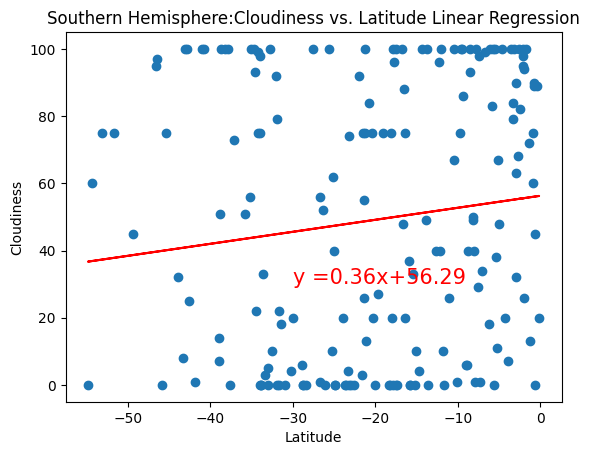

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-30,30)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

***Discussion about the linear relationship: *** Coludiness range in the northern hemisphere is greater than in the southern hemisphere. It increases as you increase in latitude.

# **Wind Speed vs. Latitude Linear Regression Plot**

the r-value is: 0.011669655765832069


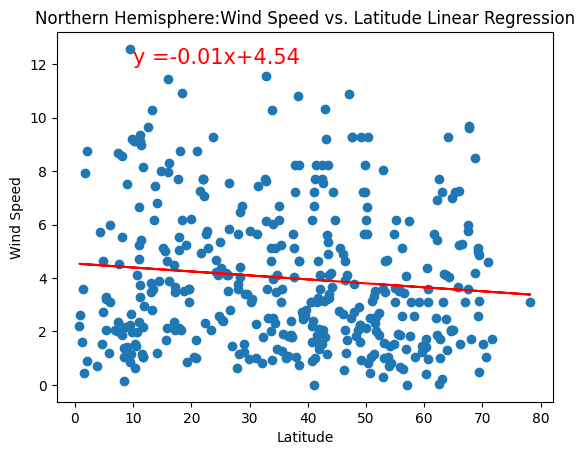

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Northern Hemisphere:Wind Speed vs. Latitude Linear Regression"
text_coordinates = (10,12)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.007217678823037616


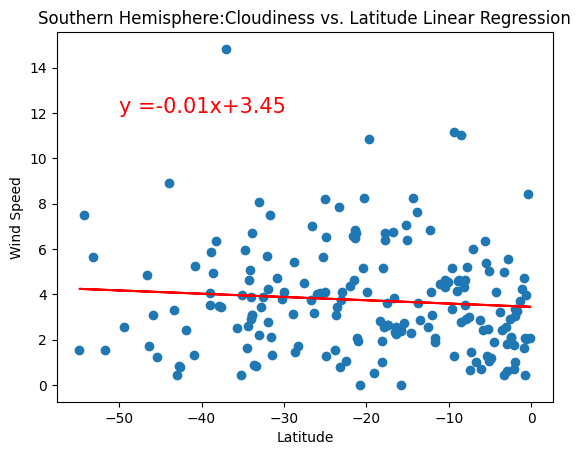

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-50,12)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

***Discussion about the linear relationship: ***
 Wind speed range does not vary much in the northern hemisphere and tends to increase the further down you go in the southern hemisphere